In [ ]:
# -----------------------
# Manipulação de Dados
# -----------------------
import numpy as np  # Cálculos numéricos e arrays.
import pandas as pd  # Manipulação de dados em tabelas (DataFrames).
import re  # Manipulação de expressões regulares para textos.
from nltk.corpus import stopwords  # Lista de palavras irrelevantes em NLP.
from sklearn.feature_extraction.text import TfidfVectorizer  # Vetorização de texto com TF-IDF.
from imblearn.over_sampling import SMOTE  # Balanceamento de classes em datasets desbalanceados.
from sklearn.model_selection import train_test_split  # Divisão de dados em conjuntos de treino e teste.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Avaliação de modelos de classificação.
from sklearn.metrics import recall_score, f1_score, precision_score  # Avaliação de modelos de classificação.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Visualização de matrizes de confusão.

pd.set_option('display.max_columns', None)  # Exibe todas as colunas do DataFrame.


# -----------------------
# Visualização de Dados
# -----------------------
import matplotlib.pyplot as plt  # Criação de gráficos estáticos.
import seaborn as sns  # Gráficos estatísticos bonitos e informativos.
import plotly.express as px  # Gráficos interativos.
from wordcloud import WordCloud  # Geração de nuvens de palavras.


# -----------------------
# Modelos de Machine Learning
# -----------------------
from sklearn.ensemble import RandomForestClassifier  # Classificador de Floresta Aleatória.
from sklearn.naive_bayes import MultinomialNB  # Classificador Naive Bayes Multinomial.
from sklearn.svm import SVC  # Classificador de Máquinas de Vetores de Suporte.


# -----------------------
# Configurações
# -----------------------
import warnings  # Gerencia mensagens de alerta.
warnings.filterwarnings("ignore")  # Ignora os avisos.


In [435]:
# Importar Base
df = pd.read_csv('../arquivos/Tweets.csv')

In [436]:
#Primeiras cinco linhas
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [437]:
#Quantidades de linhas e colunas
df.shape

(14640, 15)

In [438]:
#Colunas
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [439]:
#informações do data Set, como tipo da coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [440]:
df['negativereason'].value_counts()

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

In [441]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [442]:
# Selecionar colunas
df = df[['airline_sentiment', 'airline_sentiment_confidence', 'airline', 'text', 'tweet_location','tweet_created', 'negativereason']]

In [443]:
df['negativereason'].value_counts()

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

In [444]:
#Estatisticas sobre as colunas númericas
df.describe()

airline_sentiment_confidence
count                  14640.000000
mean                       0.900169
std                        0.162830
min                        0.335000
25%                        0.692300
50%                        1.000000
75%                        1.000000
max                        1.000000

In [445]:
#Quantidades de Companhias aéreas
df['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

In [446]:
#Quantidades de lugares onde foram feitos os tweet
df['tweet_location'].value_counts()

tweet_location
Boston, MA              157
New York, NY            156
Washington, DC          150
New York                127
USA                     126
                       ... 
Seattle (duh!)            1
South ~O-H-I-O~ Side      1
Pocono Raceway            1
denver, co                1
Nigeria,lagos             1
Name: count, Length: 3081, dtype: int64

In [447]:
# Convertendo para datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created']).dt.date

# Obtendo o range de datas
data_min = df['tweet_created'].min()
data_max = df['tweet_created'].max()
date_range = pd.date_range(start=data_min, end=data_max)

# Exibindo os resultados
print(f"Data mínima: {data_min}")
print(f"Data máxima: {data_max}")
print(f"Intervalo de datas:\n{date_range}")

Data mínima: 2015-02-16
Data máxima: 2015-02-24
Intervalo de datas:
DatetimeIndex(['2015-02-16', '2015-02-17', '2015-02-18', '2015-02-19',
               '2015-02-20', '2015-02-21', '2015-02-22', '2015-02-23',
               '2015-02-24'],
              dtype='datetime64[ns]', freq='D')


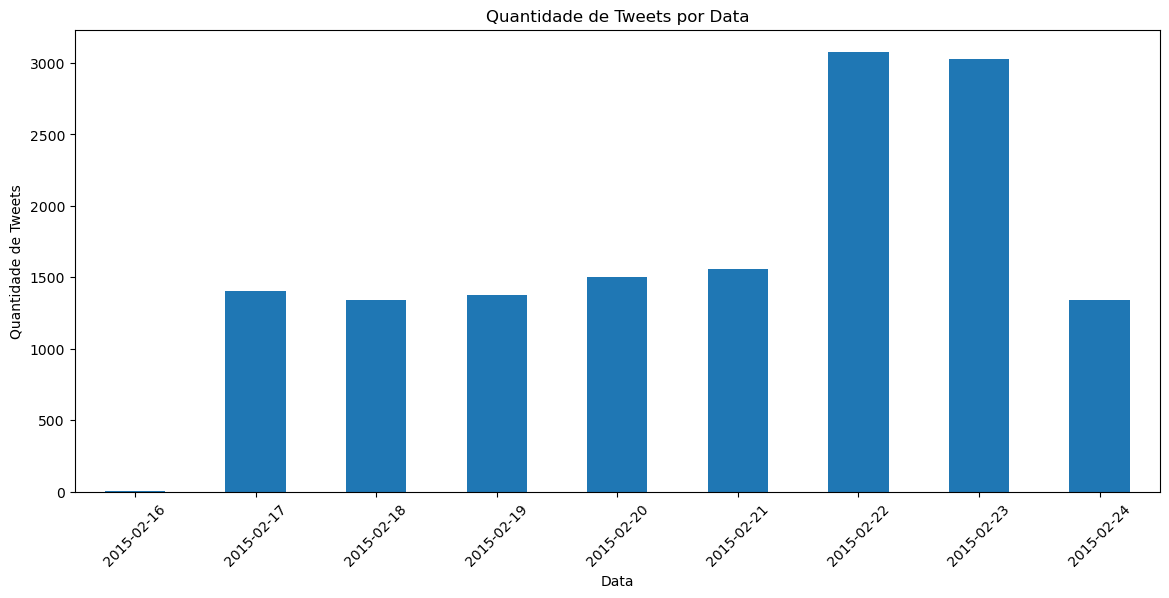

In [448]:
# Convertendo a coluna 'tweet_created' para datetime (se ainda não estiver no formato datetime)
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Agrupando os tweets por data e contando a quantidade de tweets por dia
tweets_por_data = df.groupby(df['tweet_created'].dt.date).size()

# Criando o gráfico de barras
tweets_por_data.plot(kind="bar", figsize=(14, 6), fontsize=10, rot=45, title="Quantidade de Tweets por Data")

# Ajustando os rótulos
plt.xlabel('Data', fontsize=10)
plt.ylabel('Quantidade de Tweets', fontsize=10)

# Exibindo o gráfico
plt.show()

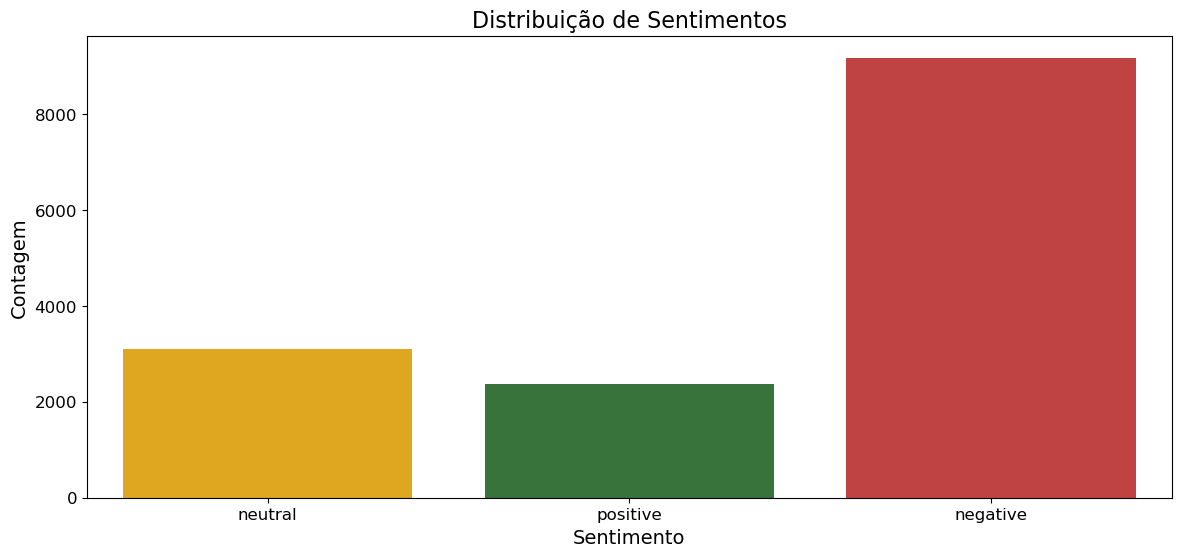

In [449]:
# Definindo as cores personalizadas
custom_colors = {"positive": "#2e7d32", "neutral": "#ffb300", "negative": "#d32f2f"}

# Criando o gráfico de barras
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df, 
    x="airline_sentiment", 
    palette=custom_colors
)

# Ajustando o layout
plt.title("Distribuição de Sentimentos", fontsize=16, loc='center')
plt.xlabel("Sentimento", fontsize=14)
plt.ylabel("Contagem", fontsize=14)
plt.grid(False)  # Remove a grade
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('white')  # Fundo branco

# Exibindo o gráfico
plt.show()

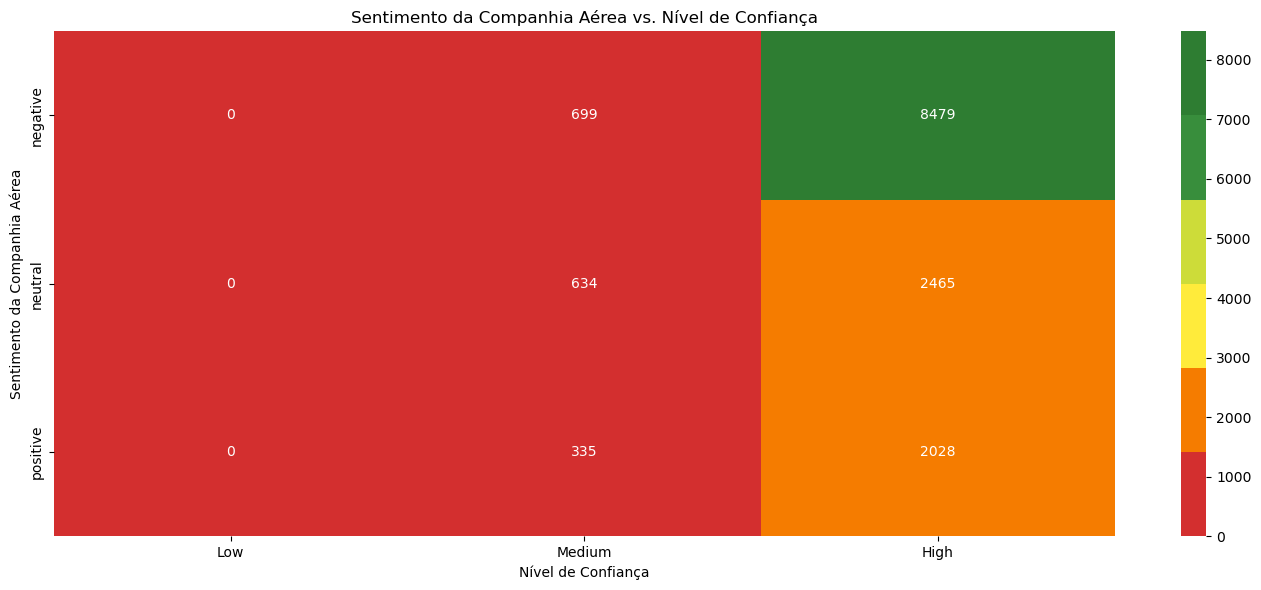

In [450]:
# Definindo os níveis de intensidade de confiança
bins = [0, 0.33, 0.66, 1]
labels = ["Low", "Medium", "High"]
df["confidence_level"] = pd.cut(df["airline_sentiment_confidence"], bins=bins, labels=labels)

# Criando a tabela cruzada
heatmap_data = df.pivot_table(
    values="airline_sentiment_confidence", 
    index="airline_sentiment", 
    columns="confidence_level", 
    aggfunc="count",
    fill_value=0
)

# Criando um mapa de cores personalizado
cmap = sns.color_palette([
    "#d32f2f",  
    "#f57c00",  
    "#ffeb3b",  
    "#cddc39",  
    "#388e3c",  
    "#2e7d32"   
])

# Plotando o heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap=cmap, cbar=True)

# Títulos e rótulos
plt.title("Sentimento da Companhia Aérea vs. Nível de Confiança")
plt.xlabel("Nível de Confiança")
plt.ylabel("Sentimento da Companhia Aérea")

# Ajustando layout
plt.tight_layout()
plt.show()

In [451]:
df.tail(1)

airline_sentiment  airline_sentiment_confidence   airline  \
14639           neutral                        0.6771  American   

                                                    text tweet_location  \
14639  @AmericanAir we have 8 ppl so we need 2 know h...     dallas, TX   

      tweet_created negativereason confidence_level  
14639    2015-02-22            NaN             High

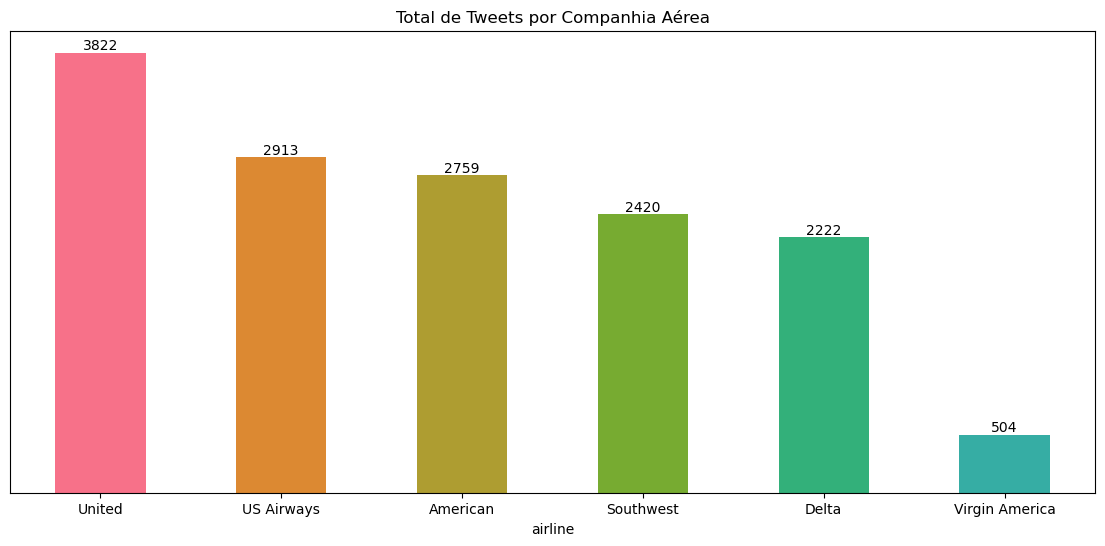

In [452]:
# Definindo a paleta de cores
colors = sns.color_palette('husl', 10)

# Criando o gráfico de barras
ax = pd.Series(df['airline']).value_counts().plot(
    kind="bar", 
    color=colors, 
    figsize=(14, 6), 
    fontsize=10, 
    rot=0, 
    title='Total de Tweets por Companhia Aérea'
)

# Adicionando rótulos de dados nas barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        fontsize=10, 
        color='black', 
        xytext=(0, 5),  
        textcoords='offset points'
    )

# Removendo o eixo Y
ax.get_yaxis().set_visible(False)

# Exibindo o gráfico
plt.show()

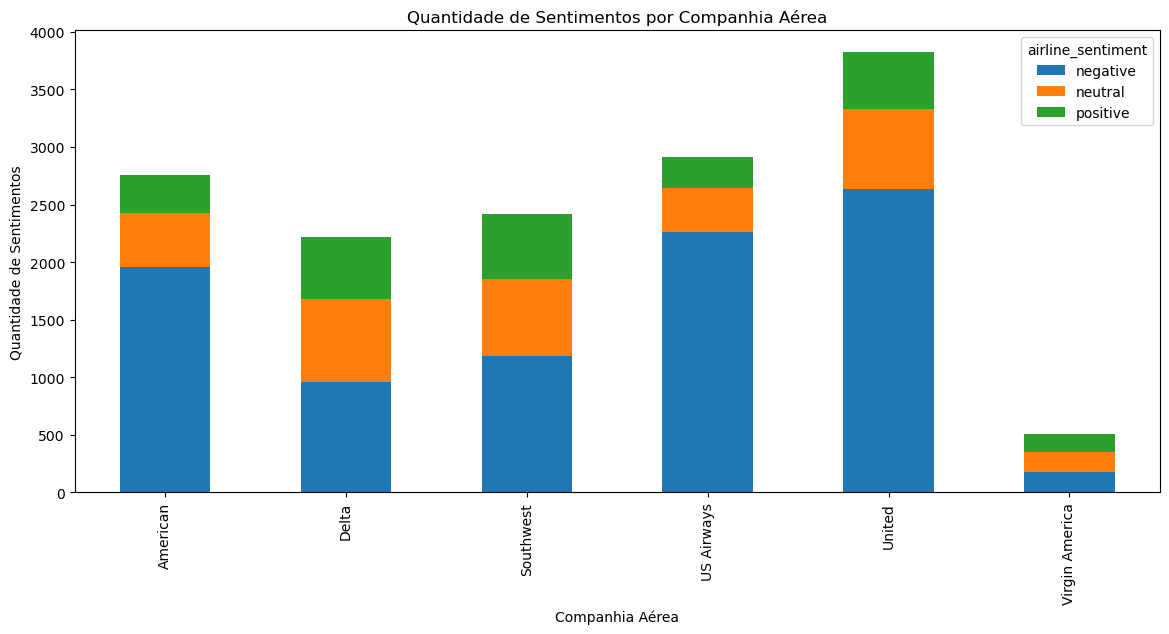

In [453]:
# Agrupando por companhia aérea e sentimento, e contando a quantidade de cada combinação
sentimentos_por_companhia = df.groupby(['airline', 'airline_sentiment']).size().unstack()

# Criando o gráfico de barras
sentimentos_por_companhia.plot(kind="bar", stacked=True, figsize=(14, 6), fontsize=10, title="Quantidade de Sentimentos por Companhia Aérea")

# Ajustando os rótulos
plt.xlabel('Companhia Aérea', fontsize=10)
plt.ylabel('Quantidade de Sentimentos', fontsize=10)

# Exibindo o gráfico
plt.show()

In [454]:
# Remove URLs do texto
def tira_url(text):
    """
    Remove URLs do texto utilizando uma expressão regular para identificar
    padrões de URLs começando com http, https ou www.
    
    Parâmetros:
    text (str): O texto do qual as URLs serão removidas.
    
    Retorna:
    str: O texto sem URLs.
    """
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


# Remove mencões de usuários (@username) do texto
def tira_username(text):
    """
    Remove mencões de usuários (palavras começando com '@') do texto utilizando
    uma expressão regular.
    
    Parâmetros:
    text (str): O texto do qual as mencões serão removidas.
    
    Retorna:
    str: O texto sem mencões de usuários.
    """
    return re.sub('@[^\s]+', '', text)


# Remove emojis do texto
def tira_emoji(text):
    """
    Remove emojis do texto utilizando uma expressão regular que captura
    todos os emojis Unicode conhecidos e os substitui por uma string vazia.
    
    Parâmetros:
    text (str): O texto do qual os emojis serão removidos.
    
    Retorna:
    str: O texto sem emojis.
    """
    emoji_pattern = re.compile("[" 
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # símbolos & pictogramas
                               u"\U0001F680-\U0001F6FF"  # símbolos de transporte e mapas
                               u"\U0001F1E0-\U0001F1FF"  # bandeiras (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Separa palavras alfanuméricas e números no texto
def sepera_alphanumerico(text):
    """
    Separa as palavras alfanuméricas e números no texto, removendo caracteres especiais.
    
    Parâmetros:
    text (str): O texto que será processado.
    
    Retorna:
    str: O texto com palavras e números separados, sem caracteres especiais.
    """
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)  # Encontra palavras e números
    return " ".join(words)

# Remove caracteres não alfabéticos, mantendo apenas letras
def remover_caracter(text):
    """
    Remove caracteres que não são letras (A-Z, a-z) do texto.
    
    Parâmetros:
    text (str): O texto a ser processado.
    
    Retorna:
    str: O texto com apenas caracteres alfabéticos.
    """
    substitute = re.sub(r'[^a-zA-Z]', ' ', text)  # Substitui caracteres não alfabéticos por espaços
    return substitute


In [455]:
# Combina a razão negativa com o texto do tweet, caso exista
df['texto_final'] = df['negativereason'].fillna('') + ' ' + df['text'] 


In [456]:
df['negativereason']

0                           NaN
1                           NaN
2                           NaN
3                    Bad Flight
4                    Can't Tell
                  ...          
14635                       NaN
14636    Customer Service Issue
14637                       NaN
14638    Customer Service Issue
14639                       NaN
Name: negativereason, Length: 14640, dtype: object

In [457]:
# Aplica as funções de pré-processamento nos tweets
df['texto_final'] = df['texto_final'].apply(lambda x: tira_username(x))  # Remove @usuário
df['texto_final'] = df['texto_final'].apply(lambda x: tira_url(x))  # Remove URLs
df['texto_final'] = df['texto_final'].apply(lambda x: tira_emoji(x))  # Remove emojis
df['texto_final'] = df['texto_final'].apply(lambda x: sepera_alphanumerico(x))  # Separa alfanumérico
df['texto_final'] = df['texto_final'].apply(lambda x: remover_caracter(x))  # Remove caracteres não alfabéticos
df['texto_final'] = df['texto_final'].apply(lambda x: x.lower())  # Converte o texto para minúsculo

In [458]:
#Texto sem ruído(para a modelagem)
df['texto_final']

0                                                what said
1        plus you ve added commercials to the experienc...
2        i didn t today must mean i need to take anothe...
3        bad flight it s really aggressive to blast obn...
4        can t tell and it s a really big bad thing abo...
                               ...                        
14635    thank you we got on a different flight to chicago
14636    customer service issue leaving over    minutes...
14637      please bring american airlines to blackberry   
14638    customer service issue you have my money you c...
14639    we have   ppl so we need   know how many seats...
Name: texto_final, Length: 14640, dtype: object

In [459]:
# Filtra as linhas do DataFrame onde o sentimento da companhia aérea é 'positive' e armazena o texto das avaliações
positive = df[df['airline_sentiment'] == 'positive'].texto_final

# Filtra as linhas do DataFrame onde o sentimento da companhia aérea é 'neutral' e armazena o texto das avaliações
neutral = df[df['airline_sentiment'] == 'neutral'].texto_final

# Filtra as linhas do DataFrame onde o sentimento da companhia aérea é 'negative' e armazena o texto das avaliações
negative = df[df['airline_sentiment'] == 'negative'].texto_final

# Negativo

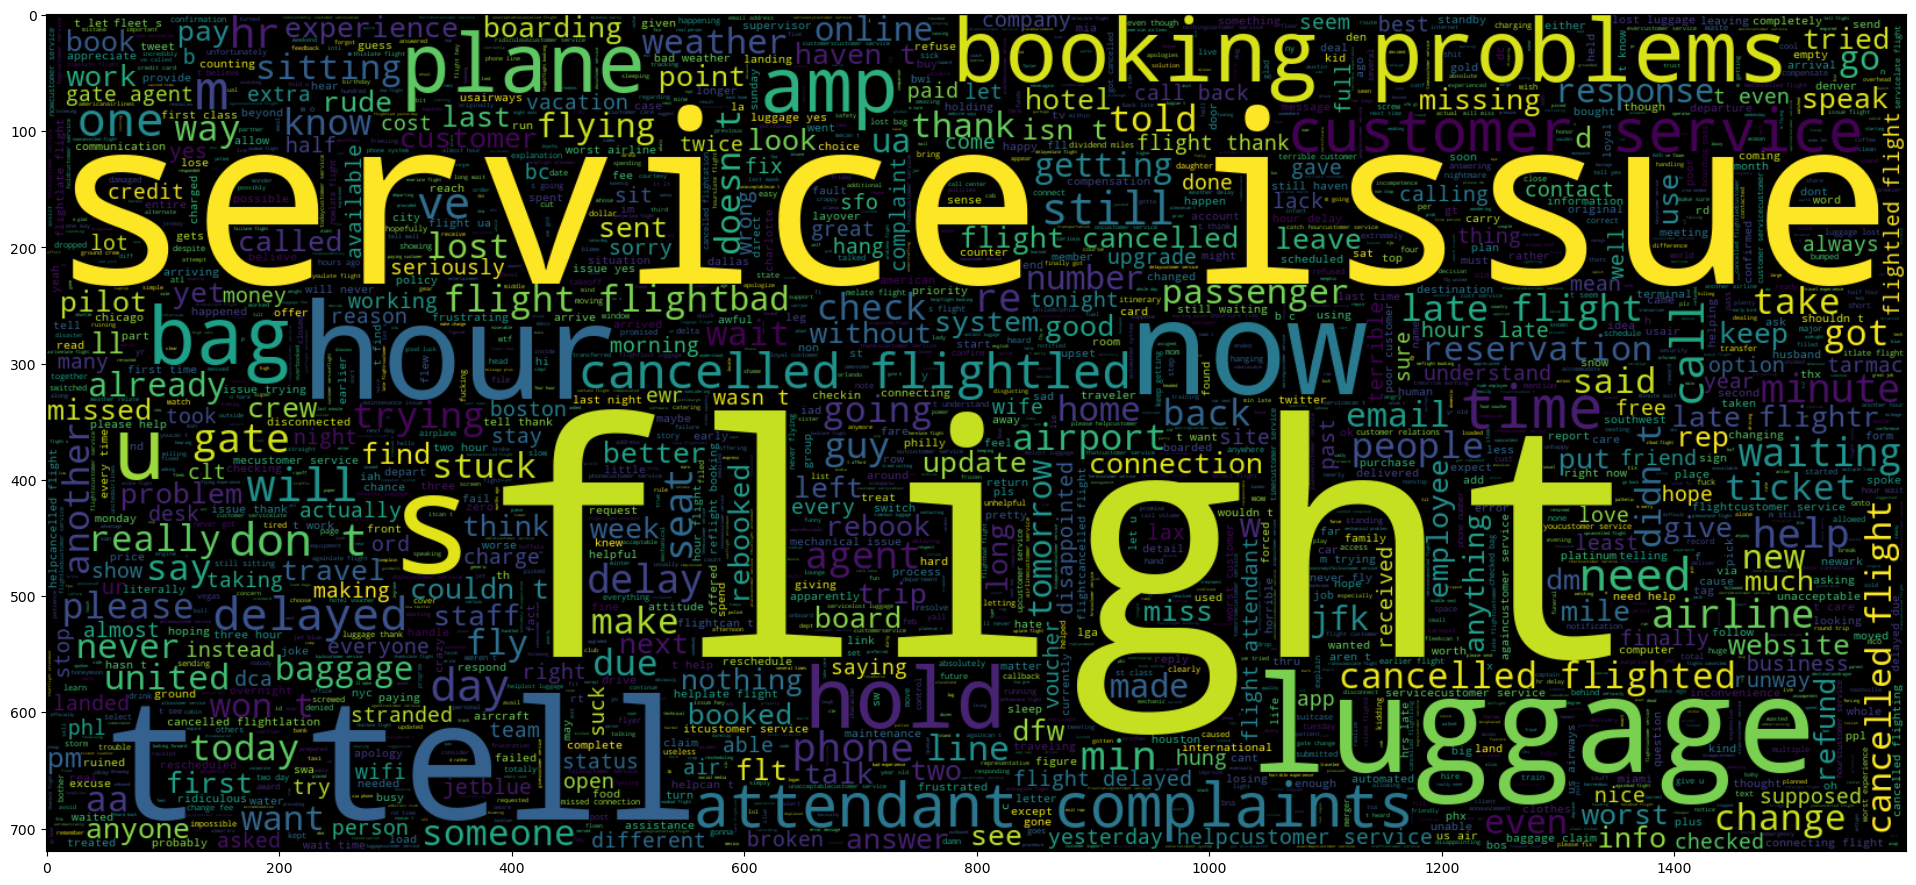

In [460]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(negative))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

# Neutro

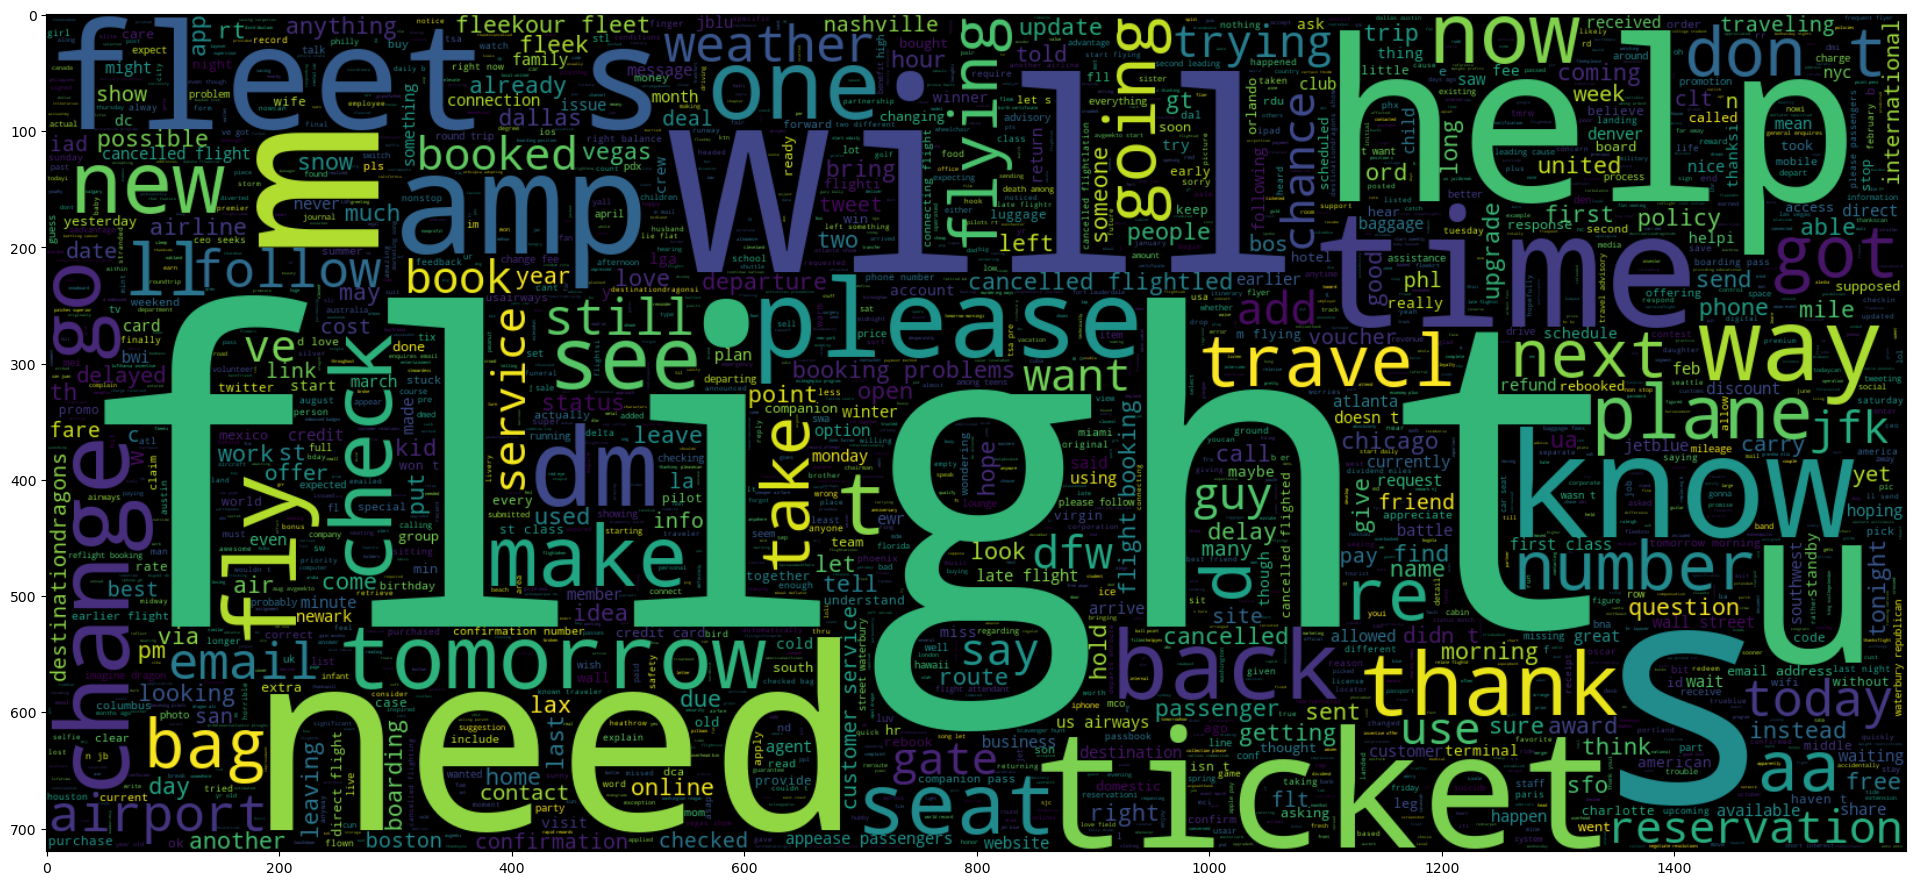

In [461]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(neutral))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

# Positivo

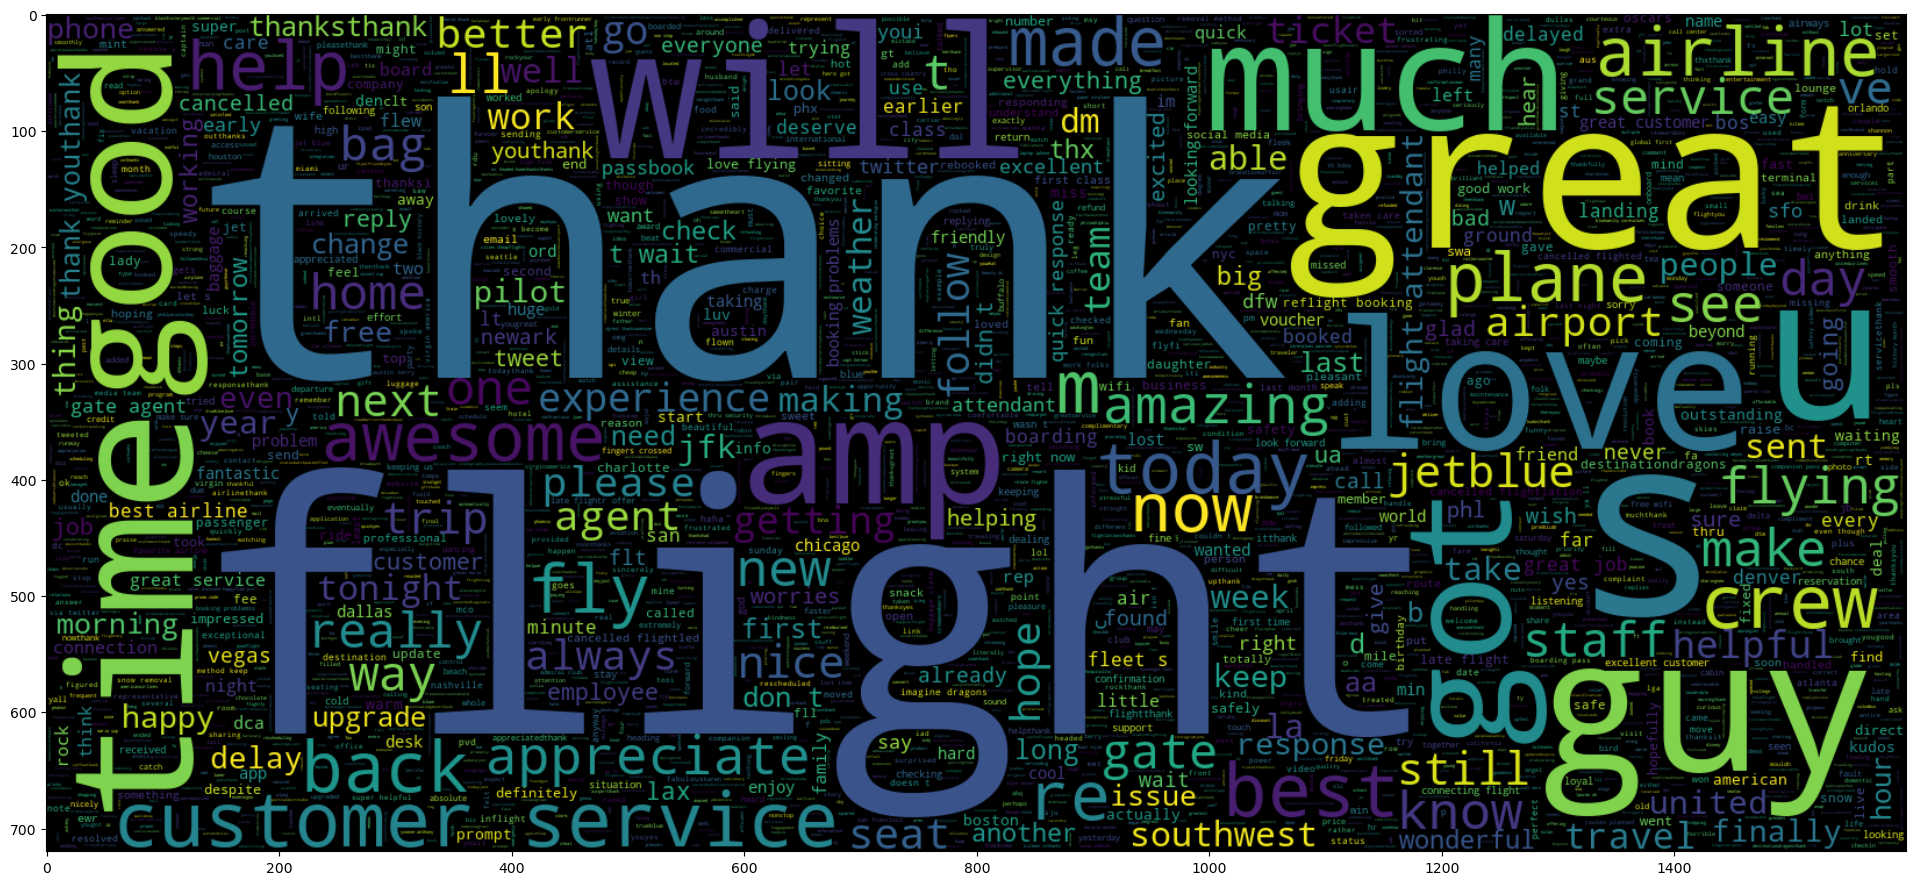

In [462]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

In [463]:
df.head()

airline_sentiment  airline_sentiment_confidence         airline  \
0           neutral                        1.0000  Virgin America   
1          positive                        0.3486  Virgin America   
2           neutral                        0.6837  Virgin America   
3          negative                        1.0000  Virgin America   
4          negative                        1.0000  Virgin America   

                                                text tweet_location  \
0                @VirginAmerica What @dhepburn said.            NaN   
1  @VirginAmerica plus you've added commercials t...            NaN   
2  @VirginAmerica I didn't today... Must mean I n...      Lets Play   
3  @VirginAmerica it's really aggressive to blast...            NaN   
4  @VirginAmerica and it's a really big bad thing...            NaN   

  tweet_created negativereason confidence_level  \
0    2015-02-24            NaN             High   
1    2015-02-24            NaN           Medium   
2    2015-02-24            NaN             High   
3    2015-02-24     Bad Flight             High   
4    2015-02-24     Can't Tell             High   

                                         texto_final  
0                                          what said  
1  plus you ve added commercials to the experienc...  
2  i didn t today must mean i need to take anothe...  
3  bad flight it s really aggressive to blast obn...  
4  can t tell and it s a really big bad thing abo...

In [464]:
#Separar x e y
X = df['texto_final']   
y = df['airline_sentiment']

In [465]:
X.shape, y.shape

((14640,), (14640,))

# Vetorização do texto

In [466]:
# A vetorização do texto é essencial porque os modelos de machine learning não entendem palavras — só números. 
tfidf = TfidfVectorizer(stop_words='english')
X_final = tfidf.fit_transform(X)

In [467]:
print(X_final)

  (0, 8194)	1.0
  (1, 7125)	0.3633486070344761
  (1, 10243)	0.2487141936500944
  (1, 123)	0.42205839924685207
  (1, 1836)	0.48349671120895515
  (1, 3267)	0.296298478979664
  (1, 9340)	0.5535556782047636
  (2, 2560)	0.4501298773327114
  (2, 9668)	0.3881724265840124
  (2, 5815)	0.5579242998459258
  (2, 6247)	0.36698761056867146
  (2, 9830)	0.4480466829503909
  (3, 751)	0.154383894408021
  (3, 3556)	0.07520299819101564
  (3, 7624)	0.19007094309233563
  (3, 204)	0.35747511722056036
  (3, 1023)	0.36864686945245756
  (3, 6522)	0.36864686945245756
  (3, 3081)	0.28478615899228715
  (3, 4138)	0.3488096329719864
  (3, 3327)	0.35747511722056036
  (3, 369)	0.16193482755134644
  (3, 5467)	0.24745102976128194
  (3, 7680)	0.34172941680948205
  (4, 751)	0.34717395085690184
  :	:
  (14636, 10415)	0.4066855008452509
  (14637, 243)	0.37993702813215885
  (14637, 1195)	0.4616525233287069
  (14637, 350)	0.42784689746504256
  (14637, 1005)	0.6778435178475031
  (14638, 3556)	0.10363600835754179
  (14638, 2250

In [468]:
print(X_final.shape)

(14640, 10866)


# Aplicando o SMOTE.

In [469]:
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(X_final,y)

### O SMOTE é importante para balancear dados porque cria exemplos sintéticos da classe minoritária, evitando o overfitting, melhorando a generalização do modelo e aumentando a precisão em classes desbalanceadas, sem perder informações da classe majoritária.

In [470]:
# Comparar as classes antes e depois do SMOTE
print("Antes do SMOTE:")
print(y.value_counts())     
print("\nDepois do SMOTE:")
print(y_smote.value_counts())


Antes do SMOTE:
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Depois do SMOTE:
airline_sentiment
neutral     9178
positive    9178
negative    9178
Name: count, dtype: int64


In [471]:
#Quantidade de linhas e colunas pós SMOTE
print(x_smote.shape, y_smote.shape)

(27534, 10866) (27534,)


In [472]:
#Separar em treino e teste
X_train , X_test , y_train , y_test = train_test_split(x_smote , y_smote , test_size=0.30,random_state=40)

# RandomForest

In [473]:
# Criação do modelo de Random Forest
random_forest_classifier = RandomForestClassifier()  

# Treinamento do modelo com os dados de treino
random_forest_classifier.fit(X_train, y_train)  

# Previsão com o modelo treinado usando os dados de teste
random_forest_classifier_prediction = random_forest_classifier.predict(X_test) 

# Calcula a acurácia comparando as previsões com os rótulos reais
accuracy_score(random_forest_classifier_prediction, y_test)  

0.9540007263043215

# Naive Bayes


In [474]:
# Criação do modelo de Naive Bayes Multinomial
nb = MultinomialNB()  
# Treinamento do modelo com os dados de treino
nb.fit(X_train, y_train)  

# Previsão com o modelo treinado usando os dados de teste
nb_prediction = nb.predict(X_test)  

# Calcula a acurácia comparando as previsões com os rótulos reais 
accuracy_score(nb_prediction, y_test)  


0.851591816971311

# SVM

In [475]:
# Criação do modelo SVM (Support Vector Machine)
svm = SVC()  

# Treinamento do modelo com os dados de treino
svm.fit(X_train, y_train)  

# Previsão com o modelo treinado usando os dados de teste
svm_prediction = svm.predict(X_test)  

# Cálculo da acurácia do modelo
accuracy_score(svm_prediction, y_test)

0.9310010894564823

# Matrix de Confusão.

## A matriz de confusão é importante porque mostra onde o modelo acerta e onde erra, permitindo avaliar quais classes estão sendo confundidas, e serve de base para métricas como precisão, recall e F1-score.

<Figure size 1600x800 with 0 Axes>

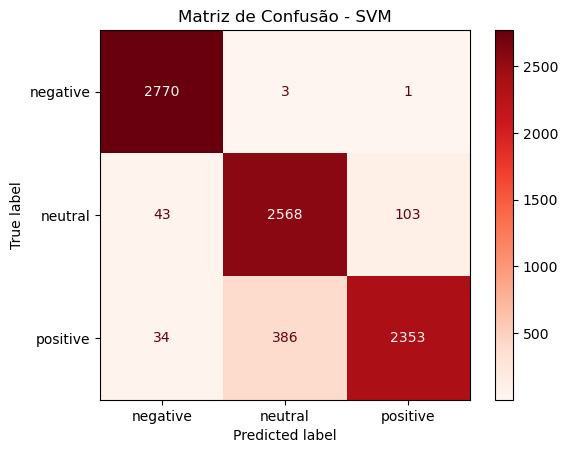

In [ ]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, svm_prediction)

# Criar a exibição com labels personalizados (usa os labels reais do seu conjunto)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)

# Plotar com colormap personalizado
plt.figure(figsize=(16, 8))
disp.plot(cmap='Reds')

plt.title("Matriz de Confusão - SVM")
plt.grid(False)
plt.show()

In [ ]:
recall = recall_score(y_test, svm_prediction, average='weighted')
f1 = f1_score(y_test, svm_prediction, average='weighted')

print("Recall:", recall)
print("F1-Score:", f1)

Recall: 0.9310010894564823
F1-Score: 0.9305360159607637
